In [23]:
import numpy as np
from io import StringIO
from matplotlib import pyplot as plt
from scipy import optimize

data1 = np.genfromtxt("ASTR19_S22_group_project_data.txt",dtype=str,delimiter=",")
data2 = []
for data in data1:
    day,time,height = data.split()
    hour,minute = time.split(":")
    hours = (float(day)-1)*24 + float(hour) + float(minute) / 60
    data2.append((round(hours,2),float(height)))
    

This just plots hours vs the height

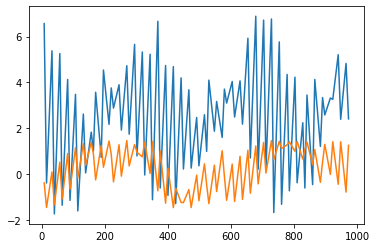

In [26]:
hours = []
height = []
for i in data2:
    hours.append(i[0])
    height.append(i[1])


def function(x, a, b):
    return a * np.cos(b * x)

params, params_covariance = optimize.curve_fit(function, np.array(hours), np.array(height))

ans = (params[0]*(np.cos(params[1]*np.array(hours))))

plt.plot(np.array(hours), np.array(height))
plt.plot(np.array(hours), ans)
plt.show()